In [1]:
import pandas as pd  
import numpy as np
import seaborn as sns

# Plotting Imports
from plotnine import *
import matplotlib.pyplot as plt

# Utility Imports
import time
# from wordcloud import WordCloud 
import nltk
nltk.download('stopwords')
import sklearn.metrics as metrics
from nltk.corpus import stopwords # remove stopwords (and punctuations) such as the, a etc. (as they do not provide any info as to whether or not the news is positive or negative)
from nltk.stem import WordNetLemmatizer # change all the words to stem words (eg loved or loves to love)
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve
from sklearn.metrics import mean_squared_error, roc_curve, accuracy_score, classification_report, plot_confusion_matrix, roc_curve, roc_auc_score, f1_score, fbeta_score

# Text-Vector Imports
from sklearn.feature_extraction.text import TfidfVectorizer

# Model Imports
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, RandomForestClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# TFIDF with source (Preliminary Results)

In [ ]:
news_data = pd.read_csv("data/news_final.csv", index_col = 0)

In [ ]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(news_data['title'], news_data['label'], test_size = 0.2, stratify = news_data['label'], shuffle = True, random_state = 7)

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')

train_vec = vectorizer.fit_transform(X_train)
test_vec = vectorizer.transform(X_test)

In [ ]:
# store results
results_tfidf = {
    "title" : {
        "default" : {
            "nb" : {},
            "svm" : {},
            "knn" : {},
            "lr" : {}, 
            "dt" : {},
            "et" : {},
            "ab" : {},
            "rf" : {}
         },
        "tuned" : {
            "nb" : {},
            "svm" : {},
            "knn" : {},
            "lr" : {}, 
            "dt" : {},
            "et" : {},
            "ab" : {},
            "rf" : {}
        }
    },
    "text" : {
        "default" : {
            "nb" : {},
            "svm" : {},
            "knn" : {},
            "lr" : {}, 
            "dt" : {},
            "et" : {},
            "ab" : {},
            "rf" : {}
        },
        "tuned" : {
            "nb" : {},
            "svm" : {},
            "knn" : {},
            "lr" : {}, 
            "dt" : {},
            "et" : {},
            "ab" : {},
            "rf" : {}
        }
    }
}

## Modelling based on Title

### MultiNomial Naive Bayes Model

C:\Users\User\anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
C:\Users\User\anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
C:\Users\User\anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
C:\Users\User\anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
C:\Users\User\anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10


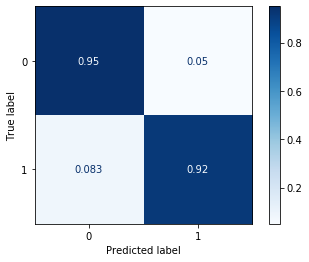

In [9]:
nb = MultinomialNB()

param_grid = {'alpha': np.linspace(0,1)}

NBmodel_title_tfidf = GridSearchCV(nb, param_grid, cv = 5, scoring = 'f1')

results_tfidf["title"]["tuned"]["nb"]["params"] = NBmodel_title_tfidf

start = time.time()

NBmodel_title_tfidf.fit(train_vec, y_train)

time_taken = time.time() - start

NBprediction = NBmodel_title_tfidf.predict(test_vec)

nb_f1_title_tfidf = f1_score(y_test, NBprediction)

plot_confusion_matrix(NBmodel_title_tfidf, test_vec, y_test, normalize = "true", cmap = "Blues").confusion_matrix

plt.grid(False)

results_tfidf["title"]["tuned"]["nb"]["time"] = time_taken
results_tfidf["title"]["tuned"]["nb"]["f1"] = nb_f1_title_tfidf

plt.savefig("nb_cm_title_tfidf.png")

### SVM Model

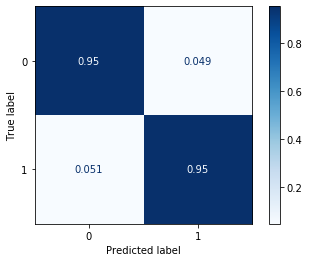

In [10]:
svm = LinearSVC()

param_grid = {'penalty':['l2'],
              'C': np.linspace(0.1,1)}

svm_title_tfidf = GridSearchCV(svm, param_grid, cv = 5, scoring = 'f1')

results_tfidf["title"]["tuned"]["svm"]["params"] = svm_title_tfidf

start = time.time()

svm_title_tfidf.fit(train_vec, y_train)

time_taken = time.time() - start

SVMprediction = svm_title_tfidf.predict(test_vec)


svm_f1_title_tfidf = f1_score(y_test, SVMprediction)


plot_confusion_matrix(svm_title_tfidf, test_vec, y_test, normalize = "true", cmap = "Blues")

plt.grid(False)

results_tfidf["title"]["tuned"]["svm"]["time"] = time_taken
results_tfidf["title"]["tuned"]["svm"]["f1"] = svm_f1_title_tfidf

plt.savefig("svm_cm_title_tfidf.png")

### KNN Model

Finding the optimal k

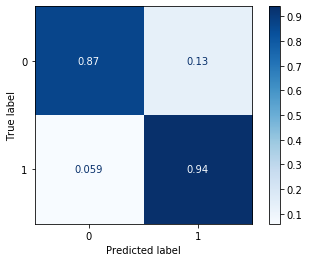

In [12]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1,100)}

knn_title_tfidf = GridSearchCV(knn, param_grid, scoring = 'f1')

results_tfidf["title"]["tuned"]["knn"]["params"] = knn_title_tfidf

start = time.time()

knn_title_tfidf.fit(train_vec, y_train)

time_taken = time.time() - start

y_pred = knn_title_tfidf.predict(test_vec)

knn_f1_title_tfidf = f1_score(y_test, y_pred)

plot_confusion_matrix(knn_title_tfidf, test_vec, y_test, normalize = "true", cmap = "Blues")

results_tfidf["title"]["tuned"]["knn"]["time"] = time_taken
results_tfidf["title"]["tuned"]["knn"]["f1"] = knn_f1_title_tfidf

plt.savefig("knn_cm_title_tfidf.png")

### Logistic Regression

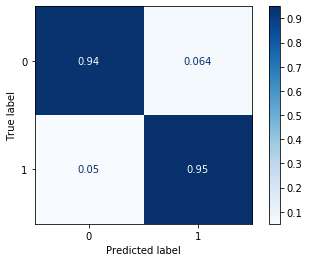

In [13]:
logreg = LogisticRegression()

param_grid = {'penalty':['l2'],
              'C': np.linspace(0.1,1)}

logreg_title_tfidf = GridSearchCV(logreg, param_grid, cv = 5, scoring='f1')

results_tfidf["title"]["tuned"]["lr"]["params"] = logreg_title_tfidf

start = time.time()

logreg_title_tfidf.fit(train_vec, y_train)

time_taken = time.time() - start

LRprediction = logreg_title_tfidf.predict(test_vec)

lr_f1_title_tfidf = f1_score(y_test, LRprediction)

plot_confusion_matrix(logreg_title_tfidf, test_vec, y_test, normalize = "true", cmap = "Blues")

results_tfidf["title"]["tuned"]["lr"]["time"] = time_taken
results_tfidf["title"]["tuned"]["lr"]["f1"] = lr_f1_title_tfidf

plt.savefig("logreg_cm_title_tfidf.png")

### Decision Tree 

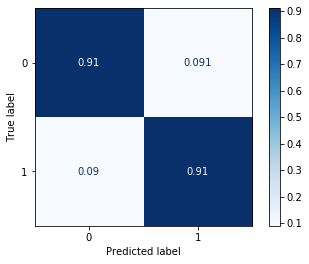

In [126]:
decision_tree = DecisionTreeClassifier(random_state = 7)

param_grid = {'max_depth':np.arange(1,1000, 100),
              'max_features':np.arange(1,1000, 100),
              'min_samples_leaf':np.arange(1,50),
              'criterion':["gini", "entropy"]}

dectree_title_tfidf = GridSearchCV(decision_tree, param_grid, cv = 5, scoring='f1')



start = time.time()

dectree_title_tfidf.fit(train_vec, y_train)

time_taken = time.time() - start

y_pred = dectree_title_tfidf.predict(test_vec)

dectree_f1_title_tfidf = f1_score(y_test, y_pred)

plot_confusion_matrix(dectree_title_tfidf, test_vec, y_test, normalize = "true", cmap = "Blues")

plt.grid(False)

results_tfidf["title"]["tuned"]["dt"]["params"] = dectree_title_tfidf.best_params_
results_tfidf["title"]["tuned"]["dt"]["time"] = time_taken
results_tfidf["title"]["tuned"]["dt"]["f1"] = dectree_f1_title_tfidf

plt.savefig("dectree_cm_title_tfidf.png")

### Extra Trees

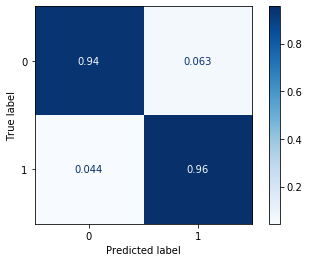

In [15]:
extra_trees = ExtraTreesClassifier(random_state = 7)

param_grid = {'n_estimators': np.arange(100, 1000, 100),
              'criterion':["gini", "entropy"]}

extratrees_title_tfidf = GridSearchCV(extra_trees, param_grid, cv = 5, scoring='f1')



start = time.time()

extratrees_title_tfidf.fit(train_vec, y_train)

time_taken = time.time() - start

y_pred = extratrees_title_tfidf.predict(test_vec)

extratrees_f1_title_tfidf = f1_score(y_test, y_pred)

plot_confusion_matrix(extratrees_title_tfidf, test_vec, y_test, normalize = "true", cmap = "Blues")

plt.grid(False)

results_tfidf["title"]["tuned"]["et"]["params"] = extratrees_title_tfidf
results_tfidf["title"]["tuned"]["et"]["time"] = time_taken
results_tfidf["title"]["tuned"]["et"]["f1"] = extratrees_f1_title_tfidf

plt.savefig("extratrees_cm_title_tfidf.png")

### AdaBoost

In [ ]:
decision_tree = DecisionTreeClassifier(random_state = 7)
adaboost = AdaBoostClassifier(base_estimator = decision_tree ,random_state=7)

param_grid = {'n_estimators': np.arange(100, 1000, 100)}

adaboost_title_tfidf = GridSearchCV(adaboost, param_grid, cv = 5, scoring='f1')

results_tfidf["title"]["tuned"]["ab"]["params"] = adaboost_title_tfidf

start = time.time()

adaboost_title_tfidf.fit(train_vec, y_train)

time_taken = time.time() - start

y_pred = adaboost_title_tfidf.predict(test_vec)

adaboost_f1_title_tfidf = f1_score(y_test, y_pred)

plot_confusion_matrix(adaboost_title_tfidf, test_vec, y_test, normalize = "true", cmap = "Blues")

plt.grid(False)

results_tfidf["title"]["tuned"]["ab"]["time"] = time_taken
results_tfidf["title"]["tuned"]["ab"]["f1"] = adaboost_f1_title_tfidf

plt.savefig("adaboost_cm_title_tfidf.png")

### Random Forests

In [ ]:
random_forests = RandomForestClassifier(random_state=7)

param_grid = {'n_estimators': np.arange(100, 1000, 100),
              'criterion':["gini", "entropy"]}

rf_title_tfidf = GridSearchCV(random_forests, param_grid, cv = 5, scoring='f1')

start = time.time()

rf_title_tfidf.fit(train_vec, y_train)

time_taken = time.time() - start

y_pred = rf_title_tfidf.predict(test_vec)

rf_f1_title_tfidf = f1_score(y_test, y_pred)

plot_confusion_matrix(rf_title_tfidf, test_vec, y_test, normalize = "true", cmap = "Blues")

plt.grid(False)

results_tfidf["title"]["tuned"]["rf"]["params"] = rf_title_tfidf.best_params_
results_tfidf["title"]["tuned"]["rf"]["time"] = time_taken
results_tfidf["title"]["tuned"]["rf"]["f1"] = rf_f1_title_tfidf

plt.savefig("rf_cm_title_tfidf.png")

### Defaults

In [14]:
nb = MultinomialNB()
start = time.time()
nb.fit(train_vec, y_train)
time_taken = time.time() - start
NBprediction = nb.predict(test_vec)
nb_f1_title_tfidf = f1_score(y_test, NBprediction)

results_tfidf["title"]["default"]["nb"]["time"] = time_taken
results_tfidf["title"]["default"]["nb"]["f1"] = nb_f1_title_tfidf

svm = LinearSVC()
start = time.time()
svm.fit(train_vec, y_train)
time_taken = time.time() - start
SVMprediction = svm.predict(test_vec)
svm_f1_title_tfidf = f1_score(y_test, SVMprediction)

results_tfidf["title"]["default"]["svm"]["time"] = time_taken
results_tfidf["title"]["default"]["svm"]["f1"] = svm_f1_title_tfidf

knn = KNeighborsClassifier()
start = time.time()
knn.fit(train_vec, y_train)
time_taken = time.time() - start
y_pred = knn.predict(test_vec)
knn_f1_title_tfidf = f1_score(y_test, y_pred)

results_tfidf["title"]["default"]["knn"]["time"] = time_taken
results_tfidf["title"]["default"]["knn"]["f1"] = knn_f1_title_tfidf

logreg = LogisticRegression()
start = time.time()
logreg.fit(train_vec, y_train)
time_taken = time.time() - start
LRprediction = logreg.predict(test_vec)
lr_f1_title_tfidf = f1_score(y_test, LRprediction)

results_tfidf["title"]["default"]["lr"]["time"] = time_taken
results_tfidf["title"]["default"]["lr"]["f1"] = lr_f1_title_tfidf

decision_tree = DecisionTreeClassifier(random_state = 7)
start = time.time()
decision_tree.fit(train_vec, y_train)
time_taken = time.time() - start
y_pred = decision_tree.predict(test_vec)
dectree_f1_title_tfidf = f1_score(y_test, y_pred)

results_tfidf["title"]["default"]["dt"]["time"] = time_taken
results_tfidf["title"]["default"]["dt"]["f1"] = dectree_f1_title_tfidf

extra_trees = ExtraTreesClassifier(random_state = 7)
start = time.time()
extra_trees.fit(train_vec, y_train)
time_taken = time.time() - start
y_pred = extra_trees.predict(test_vec)
extratrees_f1_title_tfidf = f1_score(y_test, y_pred)

results_tfidf["title"]["default"]["et"]["time"] = time_taken
results_tfidf["title"]["default"]["et"]["f1"] = extratrees_f1_title_tfidf

adaboost = AdaBoostClassifier(base_estimator = decision_tree ,random_state=7)
start = time.time()
adaboost.fit(train_vec, y_train)
time_taken = time.time() - start
y_pred = adaboost.predict(test_vec)
adaboost_f1_title_tfidf = f1_score(y_test, y_pred)

results_tfidf["title"]["default"]["ab"]["time"] = time_taken
results_tfidf["title"]["default"]["ab"]["f1"] = adaboost_f1_title_tfidf

random_forests = RandomForestClassifier(random_state=7)
start = time.time()
random_forests.fit(train_vec, y_train)
time_taken = time.time() - start
y_pred = random_forests.predict(test_vec)
rf_f1_title_tfidf = f1_score(y_test, y_pred)

results_tfidf["title"]["default"]["rf"]["time"] = time_taken
results_tfidf["title"]["default"]["rf"]["f1"] = rf_f1_title_tfidf

## Modelling based on Text

In [5]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(news_data['text'], news_data['label'], test_size = 0.2, stratify = news_data['label'], shuffle = True, random_state = 7)

In [7]:
txt_vectorizer = TfidfVectorizer(stop_words='english')

train_vec = txt_vectorizer.fit_transform(X_train)
test_vec = txt_vectorizer.transform(X_test)

### Multinomial Naive Bayes

C:\Users\User\anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
C:\Users\User\anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
C:\Users\User\anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
C:\Users\User\anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
C:\Users\User\anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10


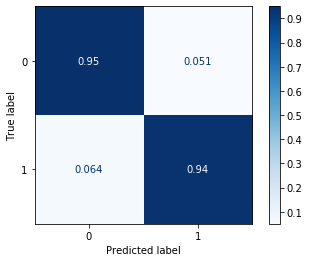

In [68]:
nb = MultinomialNB()

param_grid = {'alpha': np.linspace(0,1)}

NBmodel_text_tfidf = GridSearchCV(nb, param_grid, cv = 5, scoring = 'f1')

start = time.time()

NBmodel_text_tfidf.fit(train_vec, y_train)

time_taken = time.time() - start

NBprediction = NBmodel_text_tfidf.predict(test_vec)

nb_f1_text_tfidf = f1_score(y_test, NBprediction)

plot_confusion_matrix(NBmodel_text_tfidf, test_vec, y_test, normalize = "true", cmap = "Blues")

plt.grid(False)

results_tfidf_["text"]["tuned"]["nb"]["params"] = NBmodel_text_tfidf.best_params_
results_tfidf_["text"]["tuned"]["nb"]["time"] = time_taken
results_tfidf_["text"]["tuned"]["nb"]["f1"] = nb_f1_text_tfidf

plt.savefig("nb_cm_text_tfidf.png")

### SVM Model

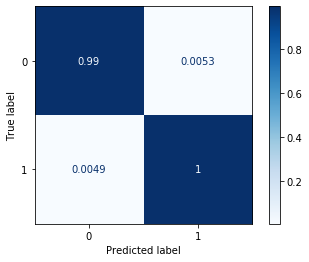

In [69]:
svm = LinearSVC()

param_grid = {'penalty':['l2'],
              'C': np.linspace(0.1,1)}

svm_text_tfidf = GridSearchCV(svm, param_grid, cv = 5, scoring = 'f1')

start = time.time()

svm_text_tfidf.fit(train_vec, y_train)

time_taken = time.time() - start

SVMprediction = svm_text_tfidf.predict(test_vec)


svm_f1_text_tfidf = f1_score(y_test, SVMprediction)


plot_confusion_matrix(svm_text_tfidf, test_vec, y_test, normalize = "true", cmap = "Blues")

plt.grid(False)

results_tfidf_["text"]["tuned"]["svm"]["params"] = svm_text_tfidf.best_params_
results_tfidf_["text"]["tuned"]["svm"]["time"] = time_taken
results_tfidf_["text"]["tuned"]["svm"]["f1"] = svm_f1_text_tfidf

plt.savefig("svm_cm_text_tfidf.png")

### KNN

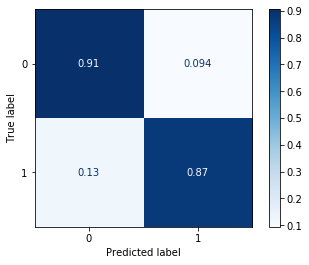

In [70]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1,100)}

knn_text_tfidf = GridSearchCV(knn, param_grid, scoring = 'f1')



start = time.time()

knn_text_tfidf.fit(train_vec, y_train)

time_taken = time.time() - start

y_pred = knn_text_tfidf.predict(test_vec)

knn_f1_text_tfidf = f1_score(y_test, y_pred)

plot_confusion_matrix(knn_text_tfidf, test_vec, y_test, normalize = "true", cmap = "Blues")

plt.grid(False)

results_tfidf_["text"]["tuned"]["knn"]["params"] = knn_text_tfidf.best_params_
results_tfidf_["text"]["tuned"]["knn"]["time"] = time_taken
results_tfidf_["text"]["tuned"]["knn"]["f1"] = knn_f1_text_tfidf

plt.savefig("knn_cm_text_tfidf.png")

### Logistic Regression

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:935: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:124: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:129: RuntimeWarning: invalid value encountered in multiply
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:935: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:124: RuntimeWarning: invalid value encountered in double_scalar

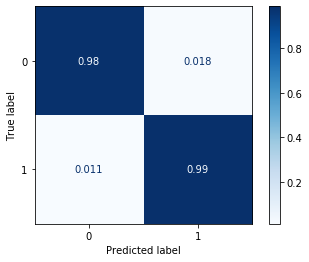

In [72]:
logreg = LogisticRegression()

param_grid = {'penalty':['l2'],
              'C': np.linspace(0,1)}

logreg_text_tfidf = GridSearchCV(logreg, param_grid, cv = 5, scoring='f1')

start = time.time()

logreg_text_tfidf.fit(train_vec, y_train)

time_taken = time.time() - start

LRprediction = logreg_text_tfidf.predict(test_vec)

lr_f1_text_tfidf = f1_score(y_test, LRprediction)

plot_confusion_matrix(logreg_text_tfidf, test_vec, y_test, normalize = "true", cmap = "Blues")

plt.grid(False)

results_tfidf_["text"]["tuned"]["lr"]["params"] = logreg_text_tfidf.best_params_
results_tfidf_["text"]["tuned"]["lr"]["time"] = time_taken
results_tfidf_["text"]["tuned"]["lr"]["f1"] = lr_f1_text_tfidf

plt.savefig("logreg_cm_text_tfidf.png")

### Decision Tree

AttributeError: module 'matplotlib.pyplot' has no attribute 'figsave'

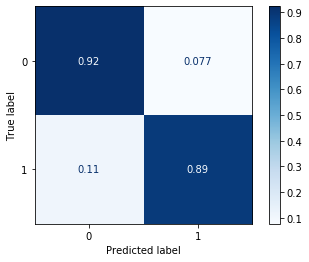

In [37]:
decision_tree = DecisionTreeClassifier(random_state = 7)

param_grid = {'max_depth':np.arange(1,1000, 100),
              'max_features':np.arange(1,1000, 100),
              'min_samples_leaf':np.arange(1,50),
              'criterion':["gini", "entropy"]}

dectree_text_tfidf = GridSearchCV(decision_tree, param_grid, cv = 5, scoring='f1')

results_tfidf["text"]["tuned"]["dt"]["params"] = dectree_text_tfidf 

start = time.time()

dectree_text_tfidf.fit(train_vec, y_train)

time_taken = time.time() - start

y_pred = dectree_text_tfidf.predict(test_vec)

dectree_f1_text_tfidf = f1_score(y_test, y_pred)

plot_confusion_matrix(dectree_text_tfidf, test_vec, y_test, normalize = "true", cmap = "Blues")

plt.grid(False)

results_tfidf["text"]["tuned"]["dt"]["time"] = time_taken
results_tfidf["text"]["tuned"]["dt"]["f1"] = dectree_f1_text_tfidf

plt.savefig("dectree_cm_text_tfidf.png")

### Extra Trees

In [12]:
# not tuned since default is quite high alredy
extra_trees = ExtraTreesClassifier(random_state = 7)

start = time.time()

extra_trees.fit(train_vec, y_train)

time_taken = time.time() - start

y_pred = extra_trees.predict(test_vec)

extratrees_f1_text_tfidf = f1_score(y_test, y_pred)

plot_confusion_matrix(extra_trees, test_vec, y_test, normalize = "true", cmap = "Blues")

plt.grid(False)

# results_tfidf["text"]["tuned"]["et"]["time"] = time_taken
# results_tfidf["text"]["tuned"]["et"]["f1"] = extratrees_f1_text_tfidf

plt.savefig("data/cm_plots/text/extratrees_cm_text_tfidf.png")

NameError: name 'extratrees_text_tfidf' is not defined

### AdaBoost

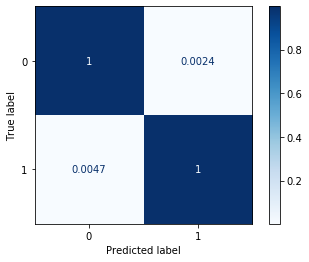

In [73]:
adaboost = AdaBoostClassifier(base_estimator = decision_tree ,random_state=7)

param_grid = {'n_estimators': np.arange(100, 1000, 100)}

adaboost_text_tfidf = GridSearchCV(adaboost, param_grid, cv = 5, scoring='f1')

start = time.time()

adaboost_text_tfidf.fit(train_vec, y_train)

time_taken = time.time() - start

y_pred = adaboost_text_tfidf.predict(test_vec)

adaboost_f1_text_tfidf = f1_score(y_test, y_pred)

plot_confusion_matrix(adaboost_text_tfidf, test_vec, y_test, normalize = "true", cmap = "Blues")

plt.grid(False)

results_tfidf_["text"]["tuned"]["ab"]["params"] = adaboost_text_tfidf.best_params_
results_tfidf_["text"]["tuned"]["ab"]["time"] = time_taken
results_tfidf_["text"]["tuned"]["ab"]["f1"] = adaboost_f1_text_tfidf

plt.savefig("adaboost_cm_text_tfidf.png")

### Random Forests

In [15]:
# not tuned since default is quite high alredy
random_forests = RandomForestClassifier(random_state=7)

start = time.time()

random_forests.fit(train_vec, y_train)

time_taken = time.time() - start

RFprediction = random_forests.predict(test_vec)

rf_f1_text_tfidf = f1_score(y_test, RFprediction)

plot_confusion_matrix(random_forests, test_vec, y_test, normalize = "true", cmap = "Blues")

plt.grid(False)

results_tfidf["text"]["tuned"]["rf"]["time"] = time_taken
results_tfidf["text"]["tuned"]["rf"]["f1"] = rf_f1_text_tfidf

plt.savefig("data/cm_plots/rf_cm_text_tfidf.png")

### Defaults

In [ ]:
# Modelling based on Text

# train test split
X_train,X_test,y_train,y_test = train_test_split(news_data['text'], news_data['label'], test_size = 0.2, stratify = news_data['label'], shuffle = True, random_state = 7)

## Tf IDF

txt_vectorizer = TfidfVectorizer(stop_words='english')

train_vec = txt_vectorizer.fit_transform(X_train)
test_vec = txt_vectorizer.transform(X_test)

## Multinomial Naive Bayes

nb = MultinomialNB()

param_grid = {'alpha': np.linspace(0,1)}

NBmodel_text_tfidf = GridSearchCV(nb, param_grid, cv = 5, scoring = 'f1')

start = time.time()

NBmodel_text_tfidf.fit(train_vec, y_train)

time_taken = time.time() - start

NBprediction = NBmodel_text_tfidf.predict(test_vec)

nb_f1_text_tfidf = f1_score(y_test, NBprediction)

plot_confusion_matrix(NBmodel_text_tfidf, test_vec, y_test, normalize = "true", cmap = "Blues")

plt.grid(False)

results_tfidf_["text"]["tuned"]["nb"]["params"] = NBmodel_text_tfidf.best_params_
results_tfidf_["text"]["tuned"]["nb"]["time"] = time_taken
results_tfidf_["text"]["tuned"]["nb"]["f1"] = nb_f1_text_tfidf

plt.savefig("nb_cm_text_tfidf.png")

## SVM Model

svm = LinearSVC()

param_grid = {'penalty':['l2'],
              'C': np.linspace(0.1,1)}

svm_text_tfidf = GridSearchCV(svm, param_grid, cv = 5, scoring = 'f1')

start = time.time()

svm_text_tfidf.fit(train_vec, y_train)

time_taken = time.time() - start

SVMprediction = svm_text_tfidf.predict(test_vec)


svm_f1_text_tfidf = f1_score(y_test, SVMprediction)


plot_confusion_matrix(svm_text_tfidf, test_vec, y_test, normalize = "true", cmap = "Blues")

plt.grid(False)

results_tfidf_["text"]["tuned"]["svm"]["params"] = svm_text_tfidf.best_params_
results_tfidf_["text"]["tuned"]["svm"]["time"] = time_taken
results_tfidf_["text"]["tuned"]["svm"]["f1"] = svm_f1_text_tfidf

plt.savefig("svm_cm_text_tfidf.png")

## k-NN Model

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1,100)}

knn_text_tfidf = GridSearchCV(knn, param_grid, scoring = 'f1')



start = time.time()

knn_text_tfidf.fit(train_vec, y_train)

time_taken = time.time() - start

y_pred = knn_text_tfidf.predict(test_vec)

knn_f1_text_tfidf = f1_score(y_test, y_pred)

plot_confusion_matrix(knn_text_tfidf, test_vec, y_test, normalize = "true", cmap = "Blues")

plt.grid(False)

results_tfidf_["text"]["tuned"]["knn"]["params"] = knn_text_tfidf.best_params_
results_tfidf_["text"]["tuned"]["knn"]["time"] = time_taken
results_tfidf_["text"]["tuned"]["knn"]["f1"] = knn_f1_text_tfidf

plt.savefig("knn_cm_text_tfidf.png")

## Logistic Regression

logreg = LogisticRegression()

param_grid = {'penalty':['l2'],
              'C': np.linspace(0,1)}

logreg_text_tfidf = GridSearchCV(logreg, param_grid, cv = 5, scoring='f1')

start = time.time()

logreg_text_tfidf.fit(train_vec, y_train)

time_taken = time.time() - start

LRprediction = logreg_text_tfidf.predict(test_vec)

lr_f1_text_tfidf = f1_score(y_test, LRprediction)

plot_confusion_matrix(logreg_text_tfidf, test_vec, y_test, normalize = "true", cmap = "Blues")

plt.grid(False)

results_tfidf_["text"]["tuned"]["lr"]["params"] = logreg_text_tfidf.best_params_
results_tfidf_["text"]["tuned"]["lr"]["time"] = time_taken
results_tfidf_["text"]["tuned"]["lr"]["f1"] = lr_f1_text_tfidf

plt.savefig("logreg_cm_text_tfidf.png")

## Decision Tree

decision_tree = DecisionTreeClassifier(random_state = 7)

param_grid = {'max_depth':np.arange(1,1000, 100),
              'max_features':np.arange(1,1000, 100),
              'min_samples_leaf':np.arange(1,50),
              'criterion':["gini", "entropy"]}

dectree_text_tfidf = GridSearchCV(decision_tree, param_grid, cv = 5, scoring='f1')

results_tfidf["text"]["tuned"]["dt"]["params"] = dectree_text_tfidf 

start = time.time()

dectree_text_tfidf.fit(train_vec, y_train)

time_taken = time.time() - start

y_pred = dectree_text_tfidf.predict(test_vec)

dectree_f1_text_tfidf = f1_score(y_test, y_pred)

plot_confusion_matrix(dectree_text_tfidf, test_vec, y_test, normalize = "true", cmap = "Blues")

plt.grid(False)

results_tfidf["text"]["tuned"]["dt"]["time"] = time_taken
results_tfidf["text"]["tuned"]["dt"]["f1"] = dectree_f1_text_tfidf

plt.savefig("dectree_cm_text_tfidf.png")

## Extra Trees

# not tuned since default is quite high alredy
extra_trees = ExtraTreesClassifier(random_state = 7)

start = time.time()

extra_trees.fit(train_vec, y_train)

time_taken = time.time() - start

y_pred = extra_trees.predict(test_vec)

extratrees_f1_text_tfidf = f1_score(y_test, y_pred)

plot_confusion_matrix(extra_trees, test_vec, y_test, normalize = "true", cmap = "Blues")

plt.grid(False)

# results_tfidf["text"]["tuned"]["et"]["time"] = time_taken
# results_tfidf["text"]["tuned"]["et"]["f1"] = extratrees_f1_text_tfidf

plt.savefig("data/cm_plots/text/extratrees_cm_text_tfidf.png")

## AdaBoost

adaboost = AdaBoostClassifier(base_estimator = decision_tree ,random_state=7)

param_grid = {'n_estimators': np.arange(100, 1000, 100)}

adaboost_text_tfidf = GridSearchCV(adaboost, param_grid, cv = 5, scoring='f1')

start = time.time()

adaboost_text_tfidf.fit(train_vec, y_train)

time_taken = time.time() - start

y_pred = adaboost_text_tfidf.predict(test_vec)

adaboost_f1_text_tfidf = f1_score(y_test, y_pred)

plot_confusion_matrix(adaboost_text_tfidf, test_vec, y_test, normalize = "true", cmap = "Blues")

plt.grid(False)

results_tfidf_["text"]["tuned"]["ab"]["params"] = adaboost_text_tfidf.best_params_
results_tfidf_["text"]["tuned"]["ab"]["time"] = time_taken
results_tfidf_["text"]["tuned"]["ab"]["f1"] = adaboost_f1_text_tfidf

plt.savefig("adaboost_cm_text_tfidf.png")

## Random Forests

# not tuned since default is quite high alredy
random_forests = RandomForestClassifier(random_state=7)

start = time.time()

random_forests.fit(train_vec, y_train)

time_taken = time.time() - start

RFprediction = random_forests.predict(test_vec)

rf_f1_text_tfidf = f1_score(y_test, RFprediction)

plot_confusion_matrix(random_forests, test_vec, y_test, normalize = "true", cmap = "Blues")

plt.grid(False)

results_tfidf["text"]["tuned"]["rf"]["time"] = time_taken
results_tfidf["text"]["tuned"]["rf"]["f1"] = rf_f1_text_tfidf

plt.savefig("data/cm_plots/rf_cm_text_tfidf.png")

## Defaults

# TFIDF without source + truncated data

In [11]:
# read in data
trunc = pd.read_csv("data/truncated_combined.csv")
without_src = pd.read_csv("data/SR_combined.csv")
with_src = pd.read_csv("data/news_final.csv")

In [12]:
# train test split
X_train_with_src,X_test_with_src,y_train_with_src,y_test_with_src = train_test_split(with_src['text'], with_src['label'], test_size = 0.2, random_state = 7)
X_train_without_src,X_test_without_src,y_train_without_src,y_test_without_src = train_test_split(without_src['text'], without_src['label'], test_size = 0.2, random_state = 7)
X_train_trunc,X_test_trunc,y_train_trunc,y_test_trunc = train_test_split(trunc['text'], trunc['label'], test_size = 0.2, random_state = 7)

In [13]:
vectorizer_with_src = TfidfVectorizer(stop_words='english')
vectorizer_without_src = TfidfVectorizer(stop_words='english')
vectorizer_trunc = TfidfVectorizer(stop_words='english')

train_vec_with_src = vectorizer_with_src.fit_transform(X_train_with_src)
test_vec_with_src = vectorizer_with_src.transform(X_test_with_src)

train_vec_without_src = vectorizer_without_src.fit_transform(X_train_without_src)
test_vec_without_src = vectorizer_without_src.transform(X_test_with_src)

train_vec_trunc = vectorizer_trunc.fit_transform(X_train_trunc)
test_vec_trunc = vectorizer_trunc.transform(X_test_with_src)

In [192]:
results_tfidf_text = {
    "f-beta" : {        
        "without_src" : {},
        "trunc" : {},
        "with_src" : {}
    }
}

In [208]:
# without src 
nb = MultinomialNB()
nb.fit(train_vec_without_src, y_train_without_src)
NBprediction = nb.predict(test_vec_without_src)
nb_fbeta_text_tfidf = fbeta_score(y_test_with_src, NBprediction, 0.5)

print("done")
results_tfidf_text["f-beta"]["without_src"]["nb"] = nb_fbeta_text_tfidf

svm = LinearSVC()
svm.fit(train_vec_without_src, y_train_without_src)
SVMprediction = svm.predict(test_vec_without_src)
svm_fbeta_text_tfidf = fbeta_score(y_test_with_src, SVMprediction, 0.5)


print("done")
results_tfidf_text["f-beta"]["without_src"]["svm"] = svm_fbeta_text_tfidf

knn = KNeighborsClassifier()
knn.fit(train_vec_without_src, y_train_without_src)
KNNprediction = knn.predict(test_vec_without_src)
knn_fbeta_text_tfidf = fbeta_score(y_test_with_src, KNNprediction, 0.5)

print("done")
results_tfidf_text["f-beta"]["without_src"]["knn"] = knn_f1_text_tfidf

logreg = LogisticRegression()
logreg.fit(train_vec_without_src, y_train_without_src)
LRprediction = logreg.predict(test_vec_without_src)
lr_fbeta_text_tfidf = fbeta_score(y_test_with_src, LRprediction, 0.5)

print("done")
results_tfidf_text["f-beta"]["without_src"]["lr"] = lr_fbeta_text_tfidf

decision_tree = DecisionTreeClassifier(random_state = 7)
decision_tree.fit(train_vec_without_src, y_train_without_src)
DTprediction = decision_tree.predict(test_vec_without_src)
dt_fbeta_text_tfidf = fbeta_score(y_test_with_src, DTprediction, 0.5)

print("done")
results_tfidf_text["f-beta"]["without_src"]["dt"] = dt_fbeta_text_tfidf

extra_trees = ExtraTreesClassifier(random_state = 7)
extra_trees.fit(train_vec_without_src, y_train_without_src)
ETprediction = extra_trees.predict(test_vec_without_src)
et_fbeta_text_tfidf = fbeta_score(y_test_with_src, ETprediction, 0.5)

print("done")
results_tfidf_text["f-beta"]["without_src"]["et"] = et_fbeta_text_tfidf

adaboost = AdaBoostClassifier(base_estimator = decision_tree ,random_state=7)
adaboost.fit(train_vec_without_src, y_train_without_src)
ABprediction = adaboost.predict(test_vec_without_src)
ab_fbeta_text_tfidf = fbeta_score(y_test_with_src, ABprediction, 0.5)

print("done")
results_tfidf_text["f-beta"]["without_src"]["ab"] = ab_fbeta_text_tfidf

random_forests = RandomForestClassifier(random_state=7)
random_forests.fit(train_vec_without_src, y_train_without_src)
RFprediction = random_forests.predict(test_vec_without_src)
rf_fbeta_text_tfidf = fbeta_score(y_test_with_src, RFprediction, 0.5)

print("done")
results_tfidf_text["f-beta"]["without_src"]["rf"] = rf_fbeta_text_tfidf

In [206]:
# np.save("results_tfidf_text_comparison.npy", results_tfidf_text)

In [211]:
# trunc
nb = MultinomialNB()
nb.fit(train_vec_trunc, y_train_trunc)
NBprediction = nb.predict(test_vec_trunc)
nb_fbeta_text_tfidf = fbeta_score(y_test_trunc, NBprediction, 0.5)

print("done")
results_tfidf_text["f-beta"]["trunc"]["nb"] = nb_fbeta_text_tfidf

svm = LinearSVC()
svm.fit(train_vec_trunc, y_train_trunc)
SVMprediction = svm.predict(test_vec_trunc)
svm_fbeta_text_tfidf = fbeta_score(y_test_trunc, SVMprediction, 0.5)

print("done")
results_tfidf_text["f-beta"]["trunc"]["svm"] = svm_fbeta_text_tfidf

knn = KNeighborsClassifier()
knn.fit(train_vec_trunc, y_train_trunc)
KNNprediction = knn.predict(test_vec_trunc)
knn_fbeta_text_tfidf = fbeta_score(y_test_trunc, KNNprediction, 0.5)

print("done")
results_tfidf_text["f-beta"]["trunc"]["knn"] = knn_fbeta_text_tfidf

logreg = LogisticRegression()
logreg.fit(train_vec_trunc, y_train_trunc)
LRprediction = logreg.predict(test_vec_trunc)
lr_fbeta_text_tfidf = fbeta_score(y_test_trunc, LRprediction, 0.5)

print("done")
results_tfidf_text["f-beta"]["trunc"]["lr"] = lr_fbeta_text_tfidf

decision_tree = DecisionTreeClassifier(random_state = 7)
decision_tree.fit(train_vec_trunc, y_train_trunc)
DTprediction = decision_tree.predict(test_vec_trunc)
dt_fbeta_text_tfidf = fbeta_score(y_test_trunc, DTprediction, 0.5)

print("done")
results_tfidf_text["f-beta"]["trunc"]["dt"] = dt_fbeta_text_tfidf


extra_trees = ExtraTreesClassifier(random_state = 7)
extra_trees.fit(train_vec_trunc, y_train_trunc)
ETprediction = extra_trees.predict(test_vec_trunc)
et_fbeta_text_tfidf = fbeta_score(y_test_trunc, ETprediction, 0.5)

print("done")
results_tfidf_text["f-beta"]["trunc"]["et"] = et_fbeta_text_tfidf

adaboost = AdaBoostClassifier(base_estimator = decision_tree ,random_state=7)
adaboost.fit(train_vec_trunc, y_train_trunc)
ABprediction = adaboost.predict(test_vec_trunc)
ab_fbeta_text_tfidf = fbeta_score(y_test_trunc, ABprediction, 0.5)

print("done")
results_tfidf_text["f-beta"]["trunc"]["ab"] = ab_fbeta_text_tfidf

random_forests = RandomForestClassifier(random_state=7)
random_forests.fit(train_vec_trunc, y_train_trunc)
RFprediction = random_forests.predict(test_vec_trunc)
rf_fbeta_text_tfidf = fbeta_score(y_test_trunc, RFprediction, 0.5)

print("done")
results_tfidf_text["f-beta"]["trunc"]["rf"] = rf_fbeta_text_tfidf

In [210]:
# np.save("results_tfidf_text_comparison.npy", results_tfidf_text)

In [25]:
# with src 
nb = MultinomialNB()
nb.fit(train_vec_with_src, y_train_with_src)
NBprediction = nb.predict(test_vec_with_src)
nb_fbeta_text_tfidf_with_src = fbeta_score(y_test_with_src, NBprediction, 0.5)

print("done")
results_tfidf_text["f-beta"]["with_src"]["nb"] = nb_fbeta_text_tfidf_with_src

svm = LinearSVC()
svm.fit(train_vec_with_src, y_train_with_src)
SVMprediction = svm.predict(test_vec_with_src)
svm_fbeta_text_tfidf_with_src = fbeta_score(y_test_with_src, SVMprediction, 0.5)


print("done")
results_tfidf_text["f-beta"]["with_src"]["svm"] = svm_fbeta_text_tfidf_with_src

knn = KNeighborsClassifier()
knn.fit(train_vec_with_src, y_train_with_src)
KNNprediction = knn.predict(test_vec_with_src)
knn_fbeta_text_tfidf_with_src = fbeta_score(y_test_with_src, KNNprediction, 0.5)

print("done")
results_tfidf_text["f-beta"]["with_src"]["knn"] = knn_fbeta_text_tfidf_with_src

logreg = LogisticRegression()
logreg.fit(train_vec_with_src, y_train_with_src)
LRprediction = logreg.predict(test_vec_with_src)
lr_fbeta_text_tfidf_with_src = fbeta_score(y_test_with_src, LRprediction, 0.5)

print("done")
results_tfidf_text["f-beta"]["with_src"]["lr"] = lr_fbeta_text_tfidf_with_src

decision_tree = DecisionTreeClassifier(random_state = 7)
decision_tree.fit(train_vec_with_src, y_train_with_src)
DTprediction = decision_tree.predict(test_vec_with_src)
dt_fbeta_text_tfidf_with_src = fbeta_score(y_test_with_src, DTprediction, 0.5)

print("done")
results_tfidf_text["f-beta"]["with_src"]["dt"] = dt_fbeta_text_tfidf_with_src

extra_trees = ExtraTreesClassifier(random_state = 7)
extra_trees.fit(train_vec_with_src, y_train_with_src)
ETprediction = extra_trees.predict(test_vec_with_src)
et_fbeta_text_tfidf_with_src = fbeta_score(y_test_with_src, ETprediction, 0.5)

print("done")
results_tfidf_text["f-beta"]["with_src"]["et"] = et_fbeta_text_tfidf_with_src

adaboost = AdaBoostClassifier(base_estimator = decision_tree ,random_state=7)
adaboost.fit(train_vec_with_src, y_train_with_src)
ABprediction = adaboost.predict(test_vec_with_src)
ab_fbeta_text_tfidf_with_src = fbeta_score(y_test_with_src, ABprediction, 0.5)

print("done")
results_tfidf_text["f-beta"]["with_src"]["ab"] = ab_fbeta_text_tfidf_with_src

random_forests = RandomForestClassifier(random_state=7)
random_forests.fit(train_vec_with_src, y_train_with_src)
RFprediction = random_forests.predict(test_vec_with_src)
rf_fbeta_text_tfidf_with_src = fbeta_score(y_test_with_src, RFprediction, 0.5)

print("done")
results_tfidf_text["f-beta"]["with_src"]["rf"] = rf_fbeta_text_tfidf_with_src

done
done
done
done
done
done


In [ ]:
# np.save("results_tfidf_text_comparison.npy", results_tfidf_text)